# 視線入力アプリ

## 1. 目的・テーマ

本Notebookでは、顔検出および視線推定技術を用いて、視線のみでPCを操作するアプリケーションを開発し、その有効性と課題を分析することを目的とする。

近年、マウスやキーボードを使わない入力手法が注目されており、視線入力は身体的制約を持つ人の支援や、ハンズフリー操作の実現において重要な技術である。本課題では、この視線入力をPythonとMediaPipeを用いて実装する。

---

## 2. 使用技術・開発環境

* Python
* OpenCV
* MediaPipe Face Landmarker
* PyAutoGUI

---

## 3. 画像の読み込み（入力データ）

本アプリでは、Webカメラから取得したリアルタイム映像を入力データとして使用する。各フレームには必ず1人以上の顔が写っており、その中から顔検出および視線推定を行う。

```python
import cv2
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()
frame
```

---

## 4. 顔検出・視線推定の方法

### 4.1 顔検出

MediaPipe Face Landmarker を使用し、顔の位置および詳細なランドマークを検出する。本実装では、1人の顔のみを対象として検出を行う。

### 4.2 視線推定

左右の虹彩（Iris）ランドマークの中心点を算出し、その平均を視線位置として利用する。これにより、ユーザーが見ている方向を推定する。

```python
# 虹彩中心の算出（例）
gaze_x = (left_iris_x + right_iris_x) / 2
gaze_y = (left_iris_y + right_iris_y) / 2
```

---


## 5. 検出結果の可視化

検出した視線位置は、Webカメラ映像上に点として描画することで可視化する。また、視線位置を画面座標に変換し、PCのカーソル操作に反映させる。


## 6. 検出結果の分析
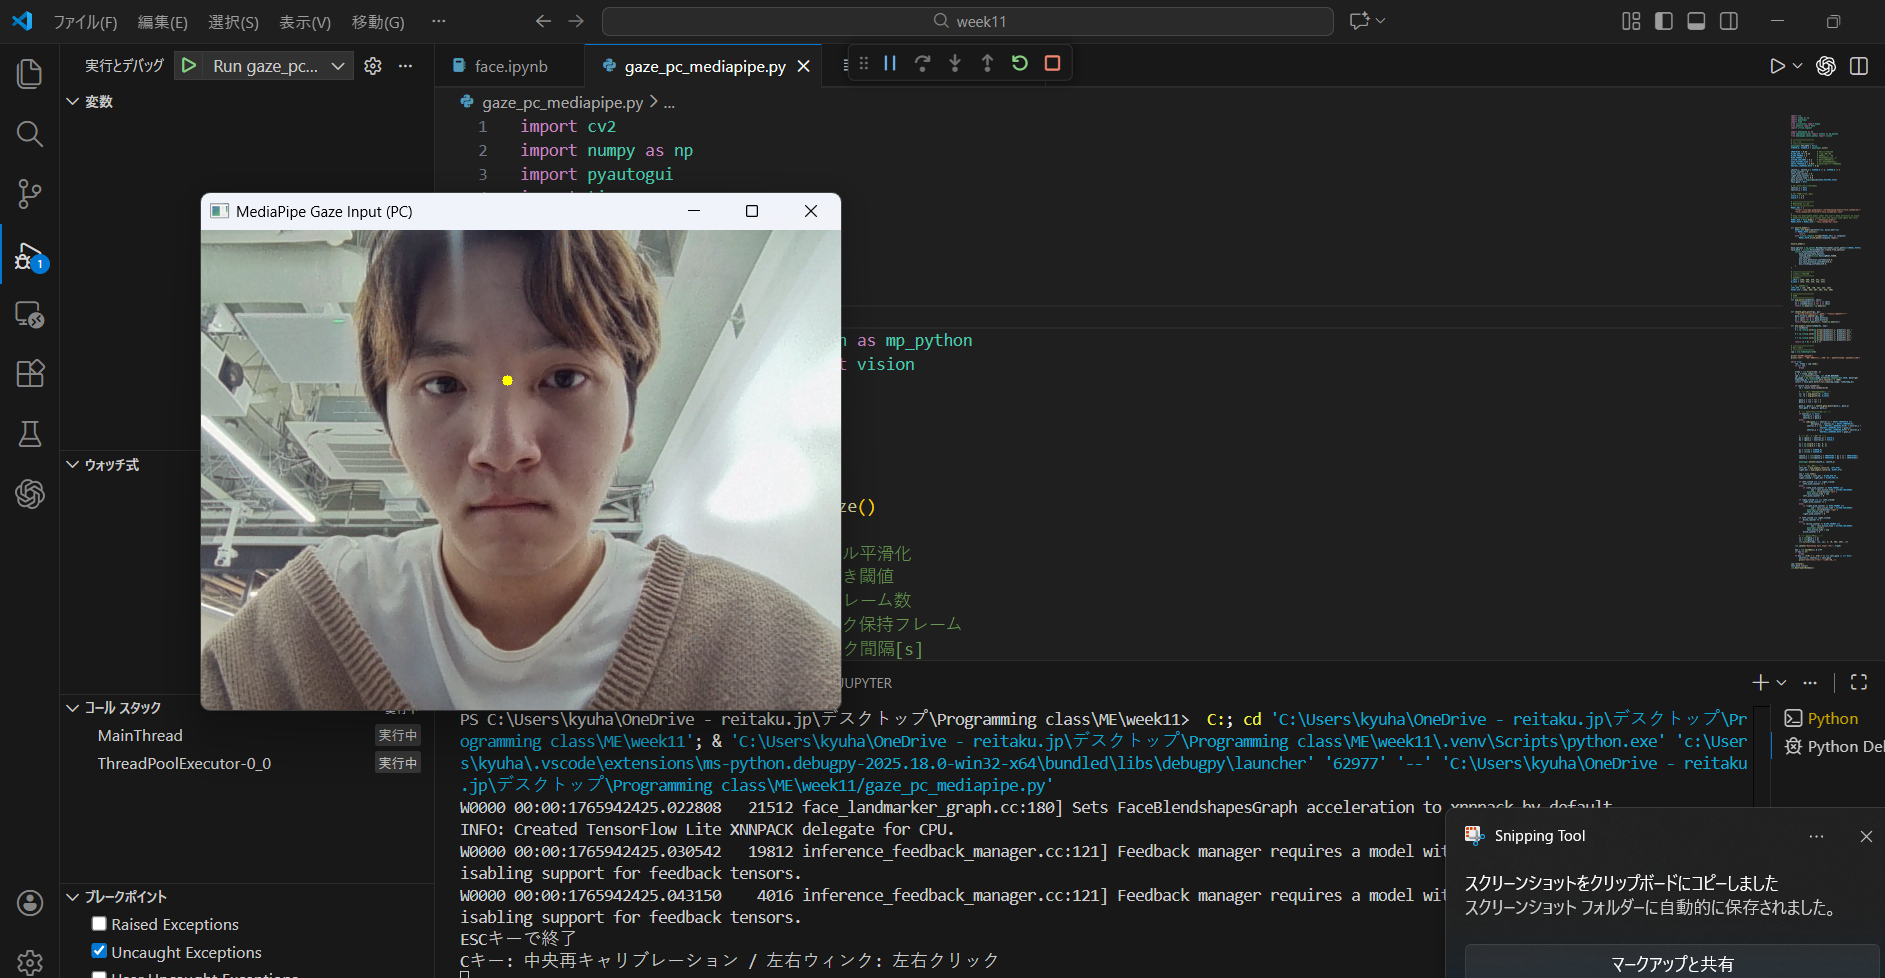

### 6.2 検出が難しかったケース

* 顔が横向き・下向きの場合
* 暗い環境で撮影した場合
* 眼鏡の反射が強い場合

これらの条件では、虹彩の検出精度が低下し、視線推定が不安定になる傾向が見られた。

### 6.3 他手法との比較（考察）

YOLOやMTCNNは顔検出には有効であるが、詳細な視線推定には向いていない。一方、MediaPipeは虹彩やまぶたまで検出可能であり、視線入力という用途に適している。

---

## 7. 所感・考察

### 7.1 こういう場面では使えそう

* マウス操作が困難な人の支援(高齢者や体に不自由がある人)
* ハンズフリー操作が必要な場面
* 将来的なVR・AR操作
* 寝ている時の画面操作

### 7.2 こういう画像では精度が落ちた

* 暗い場所
* 横顔や強い逆光
* 目がはっきり映らない画像
* 距離が離れると判定されない

### 7.3 今回のテーマでなぜこの技術が必要だったか

視線入力技術は、従来の入力デバイスに依存しない操作を可能にする。本テーマを通して、顔検出技術が単なる認識にとどまらず、操作インターフェースとして応用できることを確認した。

---

## 8. まとめ

本課題では、MediaPipeを用いた視線入力アプリを開発し、その有効性と課題を分析した。環境条件による精度低下といった課題は残るものの、視線入力は今後のユーザインターフェースとして大きな可能性を持つと考えられる。
